In [ ]:
import time
import pandas as pd
import numpy as np
from IPython.core.debugger import set_trace

In [ ]:
import string
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer


def remove_at(x):
    # remove phrases that start with @, #, http
    token = x.split()
    out = []
    stopphrases = ['@', 'RT', 'http', '#']
    for i in token:
        i = str(i)
        for stopphrase in stopphrases:
            if stopphrase in i:
                out.append(i)
                break
    token = [item.lower() for item in token if item not in out]
    z = " ".join(token)
    # remove punctuation from indivual words and remove non alphanumeric words
    token = word_tokenize(z)
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in token]
    words = [word for word in stripped if word.isalpha()]
    # remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [w for w in words if not w in stop_words]
    # stemming
    porter = PorterStemmer()
    words = [porter.stem(word) for word in words]
    if x != z:
        print(x)
        print('++++++++++++++++++')
        print(words)
        print('------------------')
    return words




# Modeling

In [ ]:
# read and shuffle dataset
df = pd.read_csv('stemmed.csv')
df = df.sample(frac=1).reset_index(drop=True)
x = df.comments
y = df.iloc[:, 2:]

(-0.5, 1599.5, 1199.5, -0.5)

Text(0.5, 1, 'Top Comments')

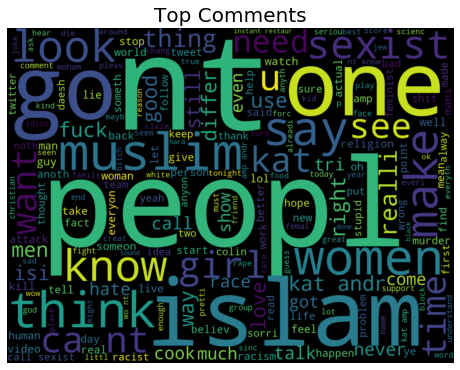

In [ ]:
# Author: Gan Yih Wee
import re
from wordcloud import WordCloud 
import matplotlib.pyplot as plt
textt = " ".join(comments for comments in df.comments)
textt=re.sub(r'([^\s\w]|_)+', '', textt)
plt.rcParams['figure.figsize'] = (8, 8)
plt.style.use('fast')
wordcloud = WordCloud(width=1600, height=1200).generate(textt)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud1.png')
plt.title('Top Comments', fontsize = 20)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [ ]:
# vectorize
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1, 2))
x_train_tfidf = vectorizer.fit_transform(x_train)
x_test_tfidf = vectorizer.transform(x_test)
vectorizer.get_feature_names()

['aaaaargh',
 'aaaah',
 'aaaah fark',
 'aaaawwwwwww',
 'aaaawwwwwww miss',
 'aaah',
 'aaah sweet',
 'aae',
 'aae yha',
 'aah',
 'aah hors',
 'aaradhna',
 'aaradhna wake',
 'ab',
 'ab fab',
 'ab nonsens',
 'abandon',
 'abandon dead',
 'abandon detest',
 'abandon gamerg',
 'abandon love',
 'abandon religion',
 'abba',
 'abba visit',
 'abbott',
 'abbott pm',
 'abc',
 'abc cancer',
 'abc news',
 'abc report',
 'abcn',
 'abcn aca',
 'abdu',
 'abdu lbaha',
 'abduct',
 'abduct kurdish',
 'aberr',
 'aberr idiot',
 'aberr muslim',
 'aberr real',
 'abhorr',
 'abhorr display',
 'abhorr posit',
 'abid',
 'abid citizen',
 'abil',
 'abil actual',
 'abil chang',
 'abil cost',
 'abil discern',
 'abil filter',
 'abil gener',
 'abil imprison',
 'abil intercept',
 'abil judg',
 'abil lock',
 'abil make',
 'abil prevent',
 'abil way',
 'abit',
 'abit counsel',
 'abl',
 'abl abus',
 'abl afford',
 'abl ar',
 'abl asshol',
 'abl breakfast',
 'abl commun',
 'abl compet',
 'abl contact',
 'abl contribut',
 'a

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.multioutput import MultiOutputClassifier
from sklearn.svm import LinearSVC

parameters = {'estimator__C': [1, 10]}
svc = LinearSVC(random_state=50)
multilabel_classifier = MultiOutputClassifier(svc, n_jobs=-1)
clf = GridSearchCV(multilabel_classifier, parameters)
clf.fit(x_train_tfidf, y_train)

GridSearchCV(estimator=MultiOutputClassifier(estimator=LinearSVC(random_state=50),
                                             n_jobs=-1),
             param_grid={'estimator__C': [1, 10]})

In [ ]:
y_pred = clf.predict(x_test_tfidf)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import hamming_loss
from sklearn.metrics import classification_report
print(accuracy_score(y_test, y_pred))
print(hamming_loss(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.8102659664577334
0.08377096391665255
              precision    recall  f1-score   support

           0       0.73      0.63      0.67      1646
           1       0.73      0.67      0.70       604
           2       0.76      0.57      0.65      1037
           3       0.00      0.00      0.00         7

   micro avg       0.74      0.62      0.67      3294
   macro avg       0.56      0.47      0.51      3294
weighted avg       0.74      0.62      0.67      3294
 samples avg       0.18      0.17      0.18      3294



E:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 1.0, 'Confusion Matrix for label 1 (bullying)')

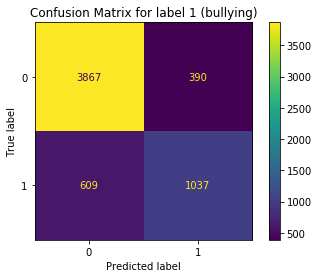

Text(0.5, 1.0, 'Confusion Matrix for label 2 (race and culture)')

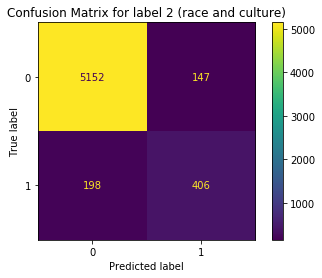

Text(0.5, 1.0, 'Confusion Matrix for label 3 (sexuality)')

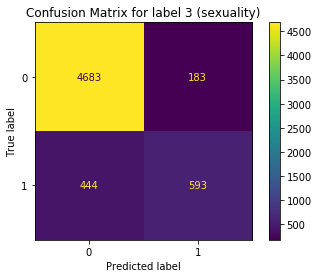

Text(0.5, 1.0, 'Confusion Matrix for label 4 (intelligence and appearance)')

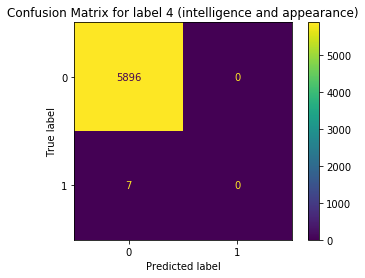

In [ ]:
from sklearn.metrics import multilabel_confusion_matrix, ConfusionMatrixDisplay
matrices = multilabel_confusion_matrix(y_test, y_pred)

cmd = ConfusionMatrixDisplay(
    matrices[0], display_labels=np.unique(y_test)).plot()
plt.title('Confusion Matrix for label 1 (bullying)')
plt.show()

cmd = ConfusionMatrixDisplay(
    matrices[1], display_labels=np.unique(y_test)).plot()
plt.title('Confusion Matrix for label 2 (race and culture)')
plt.show()

cmd = ConfusionMatrixDisplay(
    matrices[2], display_labels=np.unique(y_test)).plot()
plt.title('Confusion Matrix for label 3 (sexuality)')
plt.show()

cmd = ConfusionMatrixDisplay(
    matrices[3], display_labels=np.unique(y_test)).plot()
plt.title('Confusion Matrix for label 4 (intelligence and appearance)')
plt.show()

In [ ]:
userInput = input("Enter a string : ")
while (userInput != 'q'):
    x = []
    x.append(remove_at(userInput))
    x = pd.Series(x).apply(str)

    x = vectorizer.transform(x)

    result = clf.predict(x)
    print(result)

    if (result[0, 0] == 0):
        print("This is not a bullying comment.\n")
    else:
        if (result[0, 1] == 1):
            print("This is a bullying comment regarding race and culture.\n")
        elif (result[0, 2] == 1):
            print("This is a bullying comment regarding sexuality.\n")
        else:
            print("This is a bullying comment regarding intelligence and appearance.\n")

    userInput = input("Enter a string : ")